# Extract Performance Metrics and Characteristics from the RADx-rad Project

Performance Characteristics:
binary classification metrics, analytical performance metrics, technology characteristics

Author: Peter W Rose, UC San Diego (pwrose.ucsd@gmail.com)

Data last updated: 2025-06-09

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
# Set pandas to display all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Ensure plots display inline
%matplotlib inline

In [3]:
# Results directory
result_dir = "../../results"

In [4]:
df = pd.read_csv(os.path.join(result_dir, "data_elements.csv"), dtype=str)
df = df[["Id", "subproject", "phs_id", "project_num", "radx_id", "filename"]].copy()

In [5]:
# Field names that contain metrics
METRIC_COLUMNS = [
    "technology_platform",
    "technology_description",
    "study_population",
    "analyte_type",
    "target_analyte_type",
    "positive_samples",
    "negative_samples",
    "true_positives",
    "true_negatives",
    "false_positives",
    "false_negatives",
    "clinical_specificity",
    "clinical_sensitivity",
    "non_clinical_specificity",
    "non_clinical_sensitivity",
    "roc_x_values",
    "roc_y_values",
    "area_under_the_roc_curve",
    "positive_predictive_value",
    "negative_predictive_value",
    "positive_percent_agreement",
    "negative_percent_agreement",
    "overall_percent_agreement",
    "analytical_sensitivity",
    "limit_of_detection",
    "limit_of_quantitation",
    "limit_of_blank",
    "slope_calibration_of_curve",
    "turnaround_time",
    "price_per_test",
]

In [6]:
df = df[df["Id"].isin(METRIC_COLUMNS)]
df = df[["subproject", "phs_id", "project_num", "radx_id", "filename"]].drop_duplicates()
print(f"Number of data files with performance metrics: {df.shape[0]}")
df.head()

Number of data files with performance metrics: 125


,subproject,phs_id,project_num,radx_id,filename
705,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,rad_035_410-01,../../phs002522/rad_035_410-01_Breath_Samples_DATA_origcopy.csv
708,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,rad_035_410-01,../../phs002522/rad_035_410-01_Technology_Description_DATA_origcopy.csv
3535,Multimodal Surveillance,phs002524.v1.p1,1R01DE031114-01,rad_016_114-01,../../phs002524/rad_016_114-01_Human_Negative_Samples_DATA_origcopy.csv
3541,Multimodal Surveillance,phs002524.v1.p1,1R01DE031114-01,rad_016_114-01,../../phs002524/rad_016_114-01_Human_Negative_Sample_Results_DATA_origcopy.csv
3550,Multimodal Surveillance,phs002524.v1.p1,1R01DE031114-01,rad_016_114-01,../../phs002524/rad_016_114-01_Performance_Metrics_DATA_origcopy.csv


In [7]:
def extract_data_element(df, data_elements):
    extract_list = []

    for _, row in df.iterrows():
        phs_id = row["phs_id"]
        sub_project = row["subproject"]
        data_file = row["filename"]

        data = pd.read_csv(data_file, dtype=str, keep_default_na=False)
        # Reindex to include all metric columns (missing ones become NaN)
        data = data.reindex(columns=data_elements)
        # Replace NaN with blank strings
        data = data.fillna("")
        # Ensure all values are strings
        data = data.astype(str)

        data["phs_id"] = phs_id
        data["subproject"] = sub_project
        extract_list.append(data)

    extracted_data = pd.concat(extract_list, ignore_index=True)
    extracted_data.drop_duplicates(inplace=True)

    return extracted_data

In [8]:
cols = METRIC_COLUMNS
characteristics = extract_data_element(df, cols)

binary_classification = ["true_positives", "true_negatives", "false_positives", "false_negatives",
                         "positive_samples", "negative_samples",
                         "clinical_specificity", "clinical_sensitivity",
                         "non_clinical_specificity", "non_clinical_sensitivity",
                         "roc_x_values", "roc_y_values", "area_under_the_roc_curve",
                         "positive_predictive_value", "negative_predictive_value",
                         "positive_percent_agreement", "negative_percent_agreement",
                         "overall_percent_agreement",]

characteristics["binary_classification"] = characteristics[binary_classification].ne("").any(axis=1)
characteristics.drop(columns=binary_classification, inplace=True)

analytical_metrics = ["analytical_sensitivity", "limit_of_detection", "limit_of_quantitation", "limit_of_blank", "slope_calibration_of_curve"]
characteristics["analytical"] = characteristics[analytical_metrics].ne("").any(axis=1)
characteristics.drop(columns=analytical_metrics, inplace=True)

technology_characteristics = ["price_per_test", "turnaround_time"]
characteristics["technical"] = characteristics[technology_characteristics].ne("").any(axis=1)
characteristics.drop(columns=technology_characteristics, inplace=True)

In [9]:
characteristics.to_csv(os.path.join(result_dir, "data_performance.csv"), index=False)

In [10]:
characteristics.head(200)

,technology_platform,technology_description,study_population,analyte_type,target_analyte_type,phs_id,subproject,binary_classification,analytical,technical
0,,,college students,,,phs002522.v1.p1,Novel Biosensing and VOC,False,False,False
16,OE-HCCR,"The OE-HCCR breath analyzer uses electromagnetic analysis of exhaled breath, leveraging water vapor's high dielectric constant to differentiate lung function. It detects breath abnormalities by analyzing breath transients, distinguishing healthy patterns from those with higher nonvolatile particulate concentrations.",,,virus,phs002522.v1.p1,Novel Biosensing and VOC,False,False,False
17,,,COVID-negative volunteer,,,phs002524.v1.p1,Multimodal Surveillance,False,False,False
27,Nanoparticle-based protease assay,,,,,phs002524.v1.p1,Multimodal Surveillance,False,False,False
29,Nanoparticle-based protease assay,,COVID-negative volunteer,,,phs002524.v1.p1,Multimodal Surveillance,False,False,False
39,Nanoparticle-based protease flow assay,,COVID-negative volunteer,,,phs002524.v1.p1,Multimodal Surveillance,False,False,False
49,Nanoparticle-based protease assay,,,,,phs002524.v1.p1,Multimodal Surveillance,False,True,True
50,Nanoparticle-based protease assay,,,,,phs002524.v1.p1,Multimodal Surveillance,False,True,True
51,Nanoparticle-based protease assay,,,,,phs002524.v1.p1,Multimodal Surveillance,False,True,True
86,Nanoparticle-based protease assay,Nanoparticle-based protease assay,,,viral protein,phs002524.v1.p1,Multimodal Surveillance,False,False,False


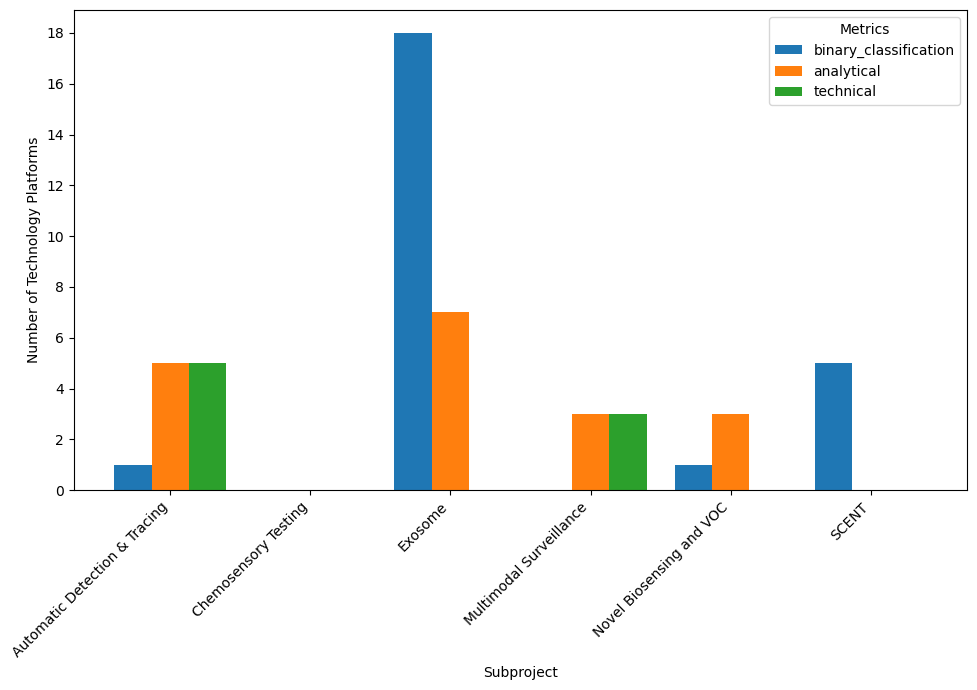

In [11]:
# Identify boolean columns
bool_cols = characteristics.select_dtypes(include='bool').columns.tolist()

# Compute count of True values per subproject for each boolean column
counts_df = characteristics.groupby('subproject')[bool_cols].sum()

# Prepare bar positions
subprojects = counts_df.index.tolist()
x = list(range(len(subprojects)))
num_cols = len(bool_cols)
bar_width = 0.8 / num_cols

# Plot
fig, ax = plt.subplots(figsize=(10, 7))
for idx, col in enumerate(bool_cols):
    ax.bar(
        [pos + idx * bar_width for pos in x],
        counts_df[col],
        width=bar_width,
        label=col
    )

# Formatting
ax.set_xlabel('Subproject')
ax.set_ylabel('Number of Technology Platforms')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xticks([pos + bar_width * (num_cols - 1) / 2 for pos in x])
ax.set_xticklabels(subprojects, rotation=45, ha='right')

ax.legend(title='Metrics')
plt.tight_layout()
plt.show()